# CREDIT CARD TRANSACTION DATA

# Introduction

In this project, we will explore the analysis of credit card transaction data using Pandas, a powerful data manipulation library in Python. The aim is to process, clean, and gain insights from transaction datasets, which may include details like transaction amounts, dates, merchant information, customer demographics, and geographical data.

Data Exploration: Load and explore transaction data to identify key features like the frequency of transactions, transaction amount distributions, and customer activity.

Data Cleaning: Handle missing or incorrect data by applying techniques such as imputation, filtering, and error correction.

Data Aggregation and Transformation: Summarize data at various levels, like daily or monthly transaction counts and sums, and perform customer segmentation based on transaction patterns.

Visualization: Use visual tools like histograms, scatter plots, and line graphs to identify trends, outliers, and patterns in transaction behavior.

Fraud Detection: Explore anomaly detection techniques, using transaction data to spot potential fraudulent activities or suspicious patterns.

By applying Pandas, we'll streamline data manipulation tasks such as sorting, grouping, and filtering, ultimately enabling deeper insights into spending behavior, customer preferences, and potential fraudulent activity. The analysis can serve as a foundation for decision-making or for developing machine learning models aimed at predicting transaction behavior.

# Importing all the necessary libraries

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data reading and understanding

In [141]:
df=pd.read_csv(r"C:\DataScience\datasets\sampled_data.csv")

In [142]:
df

,Unnamed: 0.1,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,493450,493450,2019-08-03 16:42:22,60422928733,fraud_Bode-Schuster,kids_pets,115.89,Jeffrey,Powers,M,...,-81.9748,46944,Secondary school teacher,1942-04-02,3a744933f44b321f133748af6b0659bf,1344012142,34.587407,-81.637132,0,29178.0
1,521414,521414,2019-08-12 18:44:28,180094419304907,fraud_Volkman-Predovic,shopping_net,9.60,Sharon,Smith,F,...,-117.1721,54287,"Designer, exhibition/display",1972-09-22,f871911d75576e074b0d0efc5518bf4b,1344797068,32.826867,-116.187009,0,NaN
2,1289419,1289419,2020-06-18 13:18:39,676369110710,"fraud_Bahringer, Bergnaum and Quitzon",home,109.02,David,Wolfe,M,...,-83.2911,75830,"Engineer, automotive",1974-12-28,92b895a50192c3bbd41f7b5add9b3184,1371561519,42.140335,-82.843288,0,NaN
3,547945,547945,2019-08-22 20:22:34,3540210836308425,fraud_Conroy-Emard,food_dining,54.84,Steven,Yoder,M,...,-102.5064,53,Fisheries officer,1992-06-19,c9cfb99b5417d404fc842a86a5aa72de,1345666954,35.149576,-101.816596,0,79103.0
4,545317,545317,2019-08-21 16:41:59,3540075240003197,fraud_Hudson-Grady,shopping_pos,1.53,Christian,Johns,M,...,-93.4252,5211,Chief Strategy Officer,1987-01-27,edd3f90e7dbf9a551c4ad49c2275b163,1345567319,43.955645,-92.920770,0,55927.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,228036,228036,2019-04-25 13:39:23,372246459334925,"fraud_O'Reilly, Mohr and Purdy",home,6.88,Rick,Martinez,M,...,-103.6999,1979,Multimedia programmer,1970-03-13,fa07baca72edb08dc8f327d718cf7cf7,1335361163,44.844490,-104.333123,0,NaN
9996,758568,758568,2019-11-20 19:11:56,3551217896304745,fraud_Jacobi and Sons,shopping_pos,13.63,Sara,Harris,F,...,-74.4905,6120,Chartered loss adjuster,1976-10-09,29469ee2e94de7f55332a0dc2318360a,1353438716,44.668308,-75.421534,0,13669.0
9997,509671,509671,2019-08-09 11:01:00,377234009633447,"fraud_Roob, Conn and Tremblay",shopping_pos,82.37,Theresa,Blackwell,F,...,-77.8229,1925,Systems developer,1966-02-14,970b89e5c5b467f33f4fce8fb6e76d23,1344510060,38.788978,-78.404997,0,22650.0
9998,833356,833356,2019-12-11 19:15:12,4518350514020532,"fraud_Cole, Hills and Jewess",home,133.73,Christopher,Gregory,M,...,-81.8074,14742,Teaching laboratory technician,1993-02-26,7a038f6d0f555c18e232a07cc2755386,1355253312,27.670203,-81.342276,0,NaN


In [143]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
count,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,8456.000000
mean,6.529498e+05,6.529498e+05,4.212163e+17,71.081652,49096.246600,38.565977,-90.365633,8.432912e+04,1.349397e+09,38.570353,-90.365276,0.005200,47046.110691
std,3.751927e+05,3.751927e+05,1.311542e+18,161.604637,26901.195374,5.126315,13.824714,2.866423e+05,1.287427e+07,5.158488,13.840582,0.071927,25789.456846
min,3.500000e+01,3.500000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325378e+09,19.076344,-166.633943,0.000000,1001.000000
25%,3.288478e+05,3.288478e+05,1.800429e+14,9.627500,27297.750000,34.590600,-96.985800,7.250000e+02,1.338938e+09,34.720809,-97.095845,0.000000,26154.000000
50%,6.554640e+05,6.554640e+05,3.518759e+15,48.125000,48438.000000,39.371600,-87.534300,2.398000e+03,1.349522e+09,39.367630,-87.456615,0.000000,46308.500000
75%,9.786330e+05,9.786330e+05,4.653879e+15,82.432500,72047.000000,42.076500,-80.307000,1.940800e+04,1.359745e+09,42.053513,-80.403497,0.000000,68040.000000
max,1.296591e+06,1.296591e+06,4.992346e+18,6934.270000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371814e+09,66.066896,-67.017059,1.000000,99362.000000


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0.1           10000 non-null  int64  
 1   Unnamed: 0             10000 non-null  int64  
 2   trans_date_trans_time  10000 non-null  object 
 3   cc_num                 10000 non-null  int64  
 4   merchant               10000 non-null  object 
 5   category               10000 non-null  object 
 6   amt                    10000 non-null  float64
 7   first                  10000 non-null  object 
 8   last                   10000 non-null  object 
 9   gender                 10000 non-null  object 
 10  street                 10000 non-null  object 
 11  city                   10000 non-null  object 
 12  state                  10000 non-null  object 
 13  zip                    10000 non-null  int64  
 14  lat                    10000 non-null  float64
 15  lon

# Check if there is any missing values or outliers in the dataset

In [145]:
df.isnull().sum()

Unnamed: 0.1                0
Unnamed: 0                  0
trans_date_trans_time       0
cc_num                      0
merchant                    0
category                    0
amt                         0
first                       0
last                        0
gender                      0
street                      0
city                        0
state                       0
zip                         0
lat                         0
long                        0
city_pop                    0
job                         0
dob                         0
trans_num                   0
unix_time                   0
merch_lat                   0
merch_long                  0
is_fraud                    0
merch_zipcode            1544
dtype: int64

## Dropping unwanted columns

In [146]:
df1=df.drop(columns=['Unnamed: 0.1','Unnamed: 0','lat','long','trans_num','unix_time','merch_lat','merch_long','merch_zipcode'])
df1.isnull().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
city_pop                 0
job                      0
dob                      0
is_fraud                 0
dtype: int64

## Replacing whitespace and capitalize

In [147]:
for i in df1:
    j=i.replace(' ','_')
    df1=df1.rename(columns={i:j.capitalize()})

In [148]:
df1

,Trans_date_trans_time,Cc_num,Merchant,Category,Amt,First,Last,Gender,Street,City,State,Zip,City_pop,Job,Dob,Is_fraud
0,2019-08-03 16:42:22,60422928733,fraud_Bode-Schuster,kids_pets,115.89,Jeffrey,Powers,M,38352 Parrish Road Apt. 652,North Augusta,SC,29860,46944,Secondary school teacher,1942-04-02,0
1,2019-08-12 18:44:28,180094419304907,fraud_Volkman-Predovic,shopping_net,9.60,Sharon,Smith,F,17666 David Valleys,Sun City,CA,92585,54287,"Designer, exhibition/display",1972-09-22,0
2,2020-06-18 13:18:39,676369110710,"fraud_Bahringer, Bergnaum and Quitzon",home,109.02,David,Wolfe,M,81261 Garcia Underpass Suite 741,Southfield,MI,48034,75830,"Engineer, automotive",1974-12-28,0
3,2019-08-22 20:22:34,3540210836308425,fraud_Conroy-Emard,food_dining,54.84,Steven,Yoder,M,94975 David Mews Apt. 316,Summerfield,TX,79085,53,Fisheries officer,1992-06-19,0
4,2019-08-21 16:41:59,3540075240003197,fraud_Hudson-Grady,shopping_pos,1.53,Christian,Johns,M,892 Solis Neck,Lonsdale,MN,55046,5211,Chief Strategy Officer,1987-01-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2019-04-25 13:39:23,372246459334925,"fraud_O'Reilly, Mohr and Purdy",home,6.88,Rick,Martinez,M,062 Poole Hollow Apt. 815,Deadwood,SD,57732,1979,Multimedia programmer,1970-03-13,0
9996,2019-11-20 19:11:56,3551217896304745,fraud_Jacobi and Sons,shopping_pos,13.63,Sara,Harris,F,597 Jenny Ford Apt. 543,Tupper Lake,NY,12986,6120,Chartered loss adjuster,1976-10-09,0
9997,2019-08-09 11:01:00,377234009633447,"fraud_Roob, Conn and Tremblay",shopping_pos,82.37,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,WV,25442,1925,Systems developer,1966-02-14,0
9998,2019-12-11 19:15:12,4518350514020532,"fraud_Cole, Hills and Jewess",home,133.73,Christopher,Gregory,M,9579 Porter Tunnel,Wauchula,FL,33873,14742,Teaching laboratory technician,1993-02-26,0


In [149]:
df1.shape

(10000, 16)

In [150]:
df1.dtypes

Trans_date_trans_time     object
Cc_num                     int64
Merchant                  object
Category                  object
Amt                      float64
First                     object
Last                      object
Gender                    object
Street                    object
City                      object
State                     object
Zip                        int64
City_pop                   int64
Job                       object
Dob                       object
Is_fraud                   int64
dtype: object

### 1.What was the highest amount spent in each month of 2019 in a single transaction

Trans_date_trans_time
1     1033.67
2     1049.84
3      929.89
4     6934.27
5     1284.76
6     1989.76
7     1342.28
8     3465.92
9     1155.46
10    1112.56
11    3084.36
12    5386.67
Name: Amt, dtype: float64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\2519215748.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=max_amounts['Trans_date_trans_time'].dt.strftime('%b'), y=max_amounts['Amt'],palette='viridis')


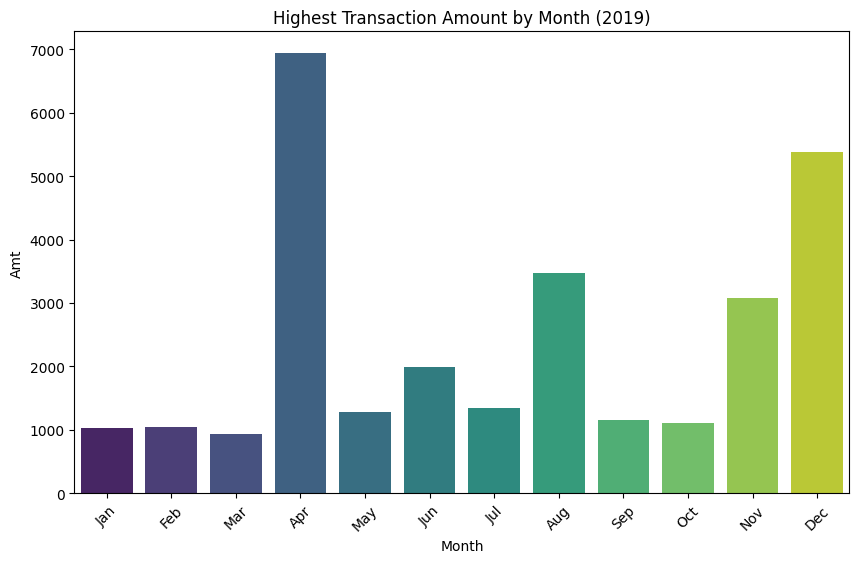

In [151]:
df1['Trans_date_trans_time'] = pd.to_datetime(df1['Trans_date_trans_time'])
df1_2019 = df1[df1['Trans_date_trans_time'].dt.year == 2019]
Max_amounts = df1_2019.groupby(df1_2019['Trans_date_trans_time'].dt.month)['Amt'].max()
print(Max_amounts)
max_amounts = df1_2019.loc[df1_2019.groupby(df1_2019['Trans_date_trans_time'].dt.to_period('M'))['Amt'].idxmax()]
max_amounts.reset_index(drop=True, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x=max_amounts['Trans_date_trans_time'].dt.strftime('%b'), y=max_amounts['Amt'],palette='viridis')
plt.title('Highest Transaction Amount by Month (2019)')
plt.xlabel('Month')
plt.ylabel('Amt')
plt.xticks(rotation=45)
plt.show()

#### The values of transactions range from $929.89 to $6934.27.This suggests a mix of small, moderate, and large transactions, indicative of diverse customer purchasing behavior.The largest transaction ($6934.27) may represent a high-value purchase or potential outlier worth further investigation.The smaller transactions (e.g., $929.89, $1033.67) could reflect routine or everyday purchases.

### 2.How many different merchants are involved in the transactions

Number of unique merchants: 693


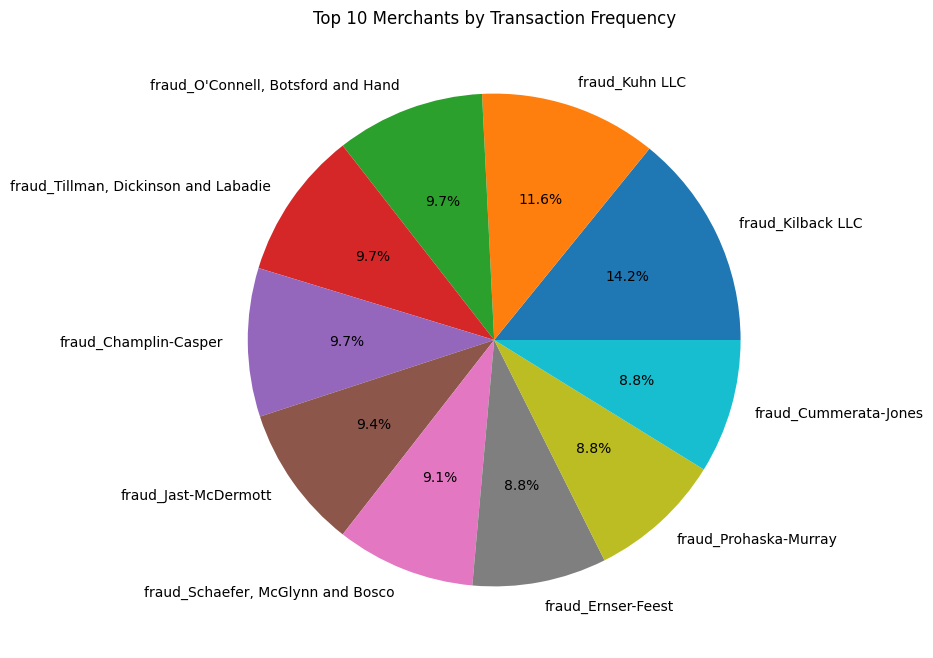

In [152]:
unique_merchants = df1['Merchant'].nunique()
print(f"Number of unique merchants: {unique_merchants}")
merchant_freq = df1['Merchant'].value_counts()
top_merchants = merchant_freq.nlargest(10)

plt.figure(figsize=(10,8))
plt.pie(top_merchants, labels=top_merchants.index, autopct='%1.1f%%')
plt.title('Top 10 Merchants by Transaction Frequency')
plt.show()

#### The dataset comprises 693 unique merchants, indicating a diverse range of vendors where credit card transactions occurred. This diversity suggests that the cardholders engage in transactions across various sectors, potentially offering insights into spending behavior, merchant categories, and market trends.

### 3.Which category of purshases are the most fraudlent transactions

          Category  fraud_count
11    shopping_net           12
4      grocery_pos           11
2    gas_transport            6
8         misc_net            5
12    shopping_pos            4
3      grocery_net            3
10   personal_care            2
6             home            2
5   health_fitness            2
1      food_dining            1
0    entertainment            1
7        kids_pets            1
9         misc_pos            1
13          travel            1


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\3796729751.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category',y='fraud_count',data=sorted_fraud_counts,palette='husl')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'shopping_net'),
  Text(1, 0, 'grocery_pos'),
  Text(2, 0, 'gas_transport'),
  Text(3, 0, 'misc_net'),
  Text(4, 0, 'shopping_pos'),
  Text(5, 0, 'grocery_net'),
  Text(6, 0, 'personal_care'),
  Text(7, 0, 'home'),
  Text(8, 0, 'health_fitness'),
  Text(9, 0, 'food_dining'),
  Text(10, 0, 'entertainment'),
  Text(11, 0, 'kids_pets'),
  Text(12, 0, 'misc_pos'),
  Text(13, 0, 'travel')])

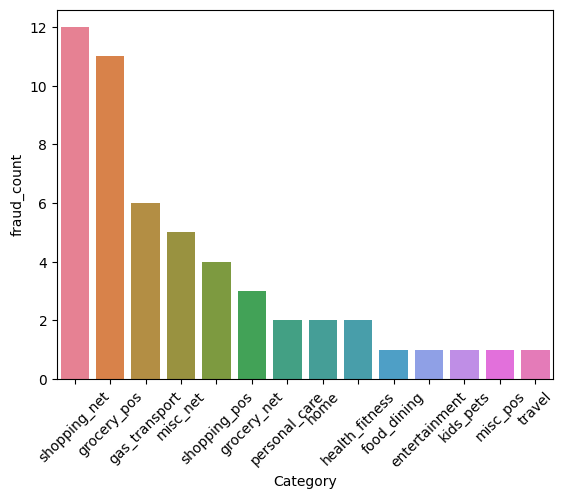

In [153]:
fraudulent_transactions = df1[df1['Is_fraud'] == True]
fraud_counts = fraudulent_transactions.groupby('Category').size().reset_index(name='fraud_count')
sorted_fraud_counts = fraud_counts.sort_values(by='fraud_count', ascending=False)
print(sorted_fraud_counts)

sns.barplot(x='Category',y='fraud_count',data=sorted_fraud_counts,palette='husl')
plt.xticks(rotation=45)

#### Shopping (net) leads with 12 fraud cases, followed closely by grocery (POS) with 11. These categories may require heightened monitoring and security measures.Gas and transport (6 cases) and miscellaneous (net) (5 cases) also show moderate fraud risk, indicating these could be avenues for targeted fraud prevention efforts.Categories like food and dining, entertainment, kids and pets, miscellaneous (POS), and travel each have only 1 fraud case. This might reflect lower overall transaction volumes or lesser appeal to fraudulent actors.

### 4.How many male and female are involved in fraudlent transaction 

Males involved in fraudulent transactions: 23
Females involved in fraudulent transactions: 29


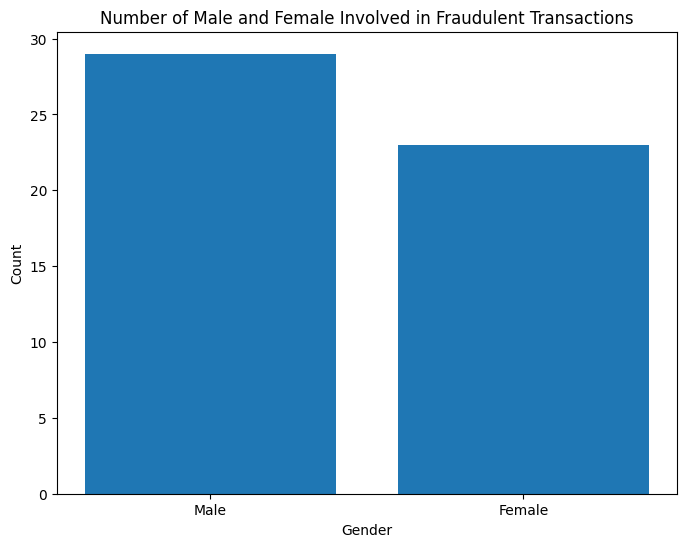

In [154]:
fraudulent_transactions = df1[df1['Is_fraud'] == 1]
gender_counts = fraudulent_transactions['Gender'].value_counts()
print("Males involved in fraudulent transactions:", gender_counts['M'])
print("Females involved in fraudulent transactions:", gender_counts['F'])

gender_counts = fraudulent_transactions['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'count']

plt.figure(figsize=(8, 6))
plt.bar(gender_counts['Gender'], gender_counts['count'])
plt.title('Number of Male and Female Involved in Fraudulent Transactions')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(gender_counts['Gender'], ['Male', 'Female'])
plt.show()

#### Out of the total 52 fraudulent cases, 23 (44.2%) were males, and 29 (55.8%) were females.This indicates a slightly higher involvement of females in fraudulent transactions compared to males.The gender imbalance may reflect differences in spending behavior, transaction preferences, or exposure to fraud-prone categories.


### 5.Top 5 most frequent city where transactions occured

Top 5 most frequent cities:
City
Phoenix       51
Brandon       46
Burbank       44
Birmingham    43
Meridian      42
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\894791307.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_cities.index, y=top_5_cities.values,palette='Blues_d')


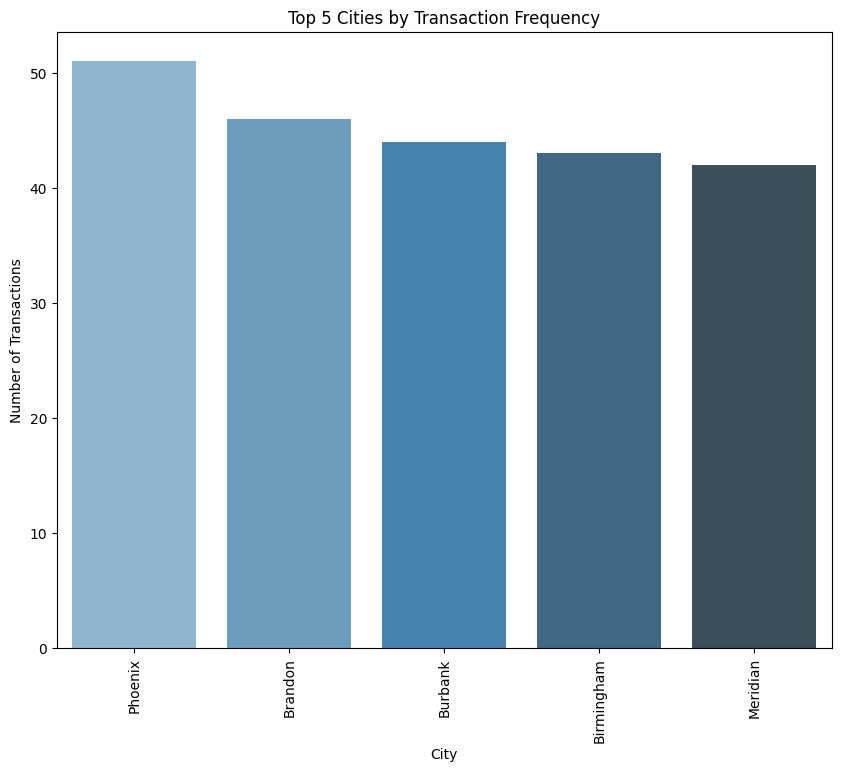

In [155]:
city_counts = df1['City'].value_counts()
top_5_cities = city_counts.nlargest(5)
print("Top 5 most frequent cities:")
print(top_5_cities)

plt.figure(figsize=(10, 8))
sns.barplot(x=top_5_cities.index, y=top_5_cities.values,palette='Blues_d')
plt.title('Top 5 Cities by Transaction Frequency')
plt.xlabel('City')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


#### Phoenix tops the list with 51 transactions, followed by Brandon (46), Burbank (44), Birmingham (43), and Meridian (42).These cities collectively represent areas with significant transaction activity, potentially indicating higher customer density, greater merchant presence, or regional trends in card usage.



### 6.How many cardholders are from cities with populations under 500

Number of cardholders from cities with populations under 500: 1861


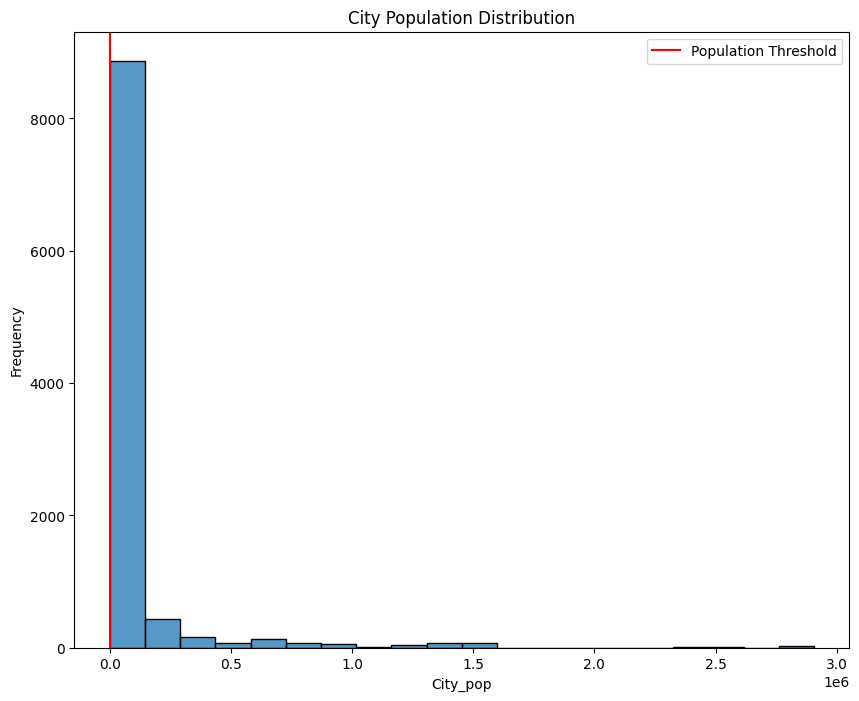

In [156]:
small_town_cardholders = df1[df1['City_pop'] < 500]

num_small_town_cardholders = small_town_cardholders.shape[0]

print("Number of cardholders from cities with populations under 500:", num_small_town_cardholders)

plt.figure(figsize=(10, 8))
sns.histplot(df2['City_pop'], bins=20)
plt.title('City Population Distribution')
plt.xlabel('City_pop')
plt.ylabel('Frequency')
plt.axvline(x=500, color='r', label='Population Threshold')
plt.legend()
plt.show()

#### The data shows that 1861 cardholders are from cities with populations under 500, highlighting the significance of small communities in the credit card transaction dataset.Small towns may have unique fraud patterns. For instance:Limited merchant diversity could make unusual transactions easier to detect.Fraudsters might target such areas due to perceived lower awareness or security measures.By recognizing the contribution of small-town cardholders, the project can ensure equitable fraud prevention measures and deliver services tailored to the needs of these communities.

### 7.How many different categories are involved in the transaction

Category
gas_transport     1043
home               987
grocery_pos        932
shopping_pos       880
kids_pets          877
shopping_net       765
personal_care      682
entertainment      679
food_dining        673
health_fitness     671
misc_pos           620
misc_net           502
grocery_net        375
travel             314
Name: count, dtype: int64


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\2638100329.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=transaction_counts.index, y=transaction_counts.values,palette='viridis')


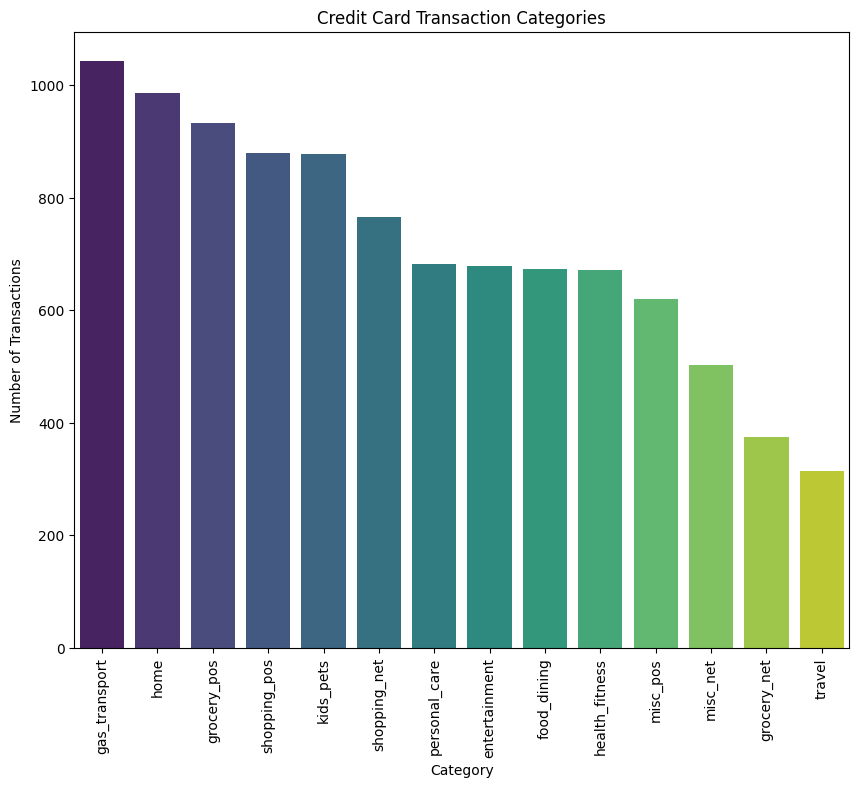

In [157]:
transaction_counts = df1['Category'].value_counts()
print(transaction_counts)


plt.figure(figsize=(10, 8))
sns.barplot(x=transaction_counts.index, y=transaction_counts.values,palette='viridis')
plt.title('Credit Card Transaction Categories')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)
plt.show()


#### Gas/Transport,home and Grocery (POS): High-frequency categories point to essential, recurring expenses. These categories may serve as benchmarks for normal transaction behavior.This categorical breakdown provides actionable insights into customer spending habits and areas for both risk mitigation and strategic opportunities.

### 8.Find the average age of cardholders by analysing their date of birth

Average age of cardholders: 50.59


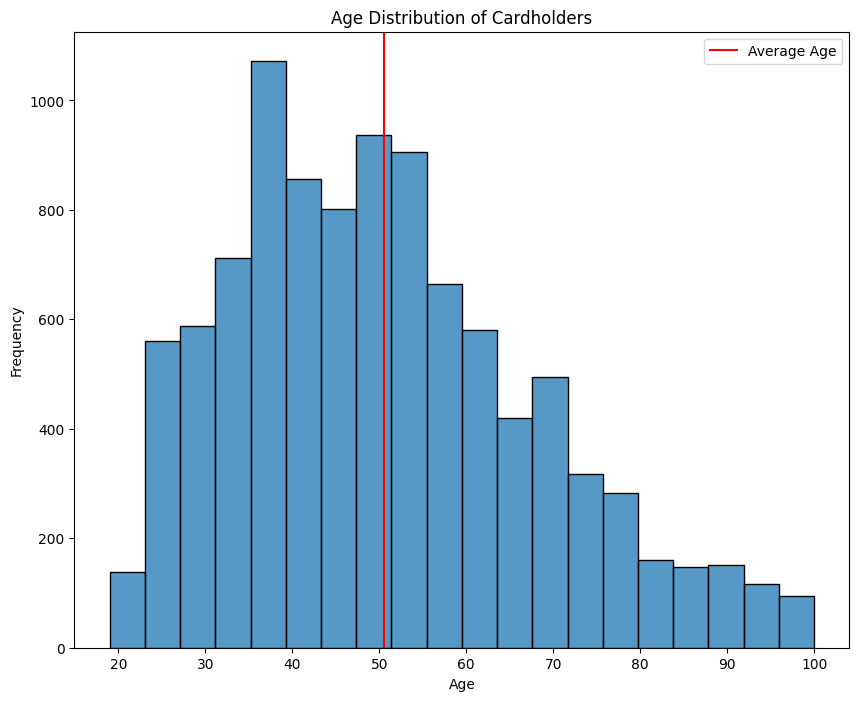

In [158]:
from datetime import datetime

df1['Dob'] = pd.to_datetime(df1['Dob'])
df1['Age'] = (datetime.now() - df1['Dob']).dt.days // 365
average_age = df1['Age'].mean()
print("Average age of cardholders:", average_age)

plt.figure(figsize=(10, 8))
sns.histplot(df1['Age'], bins=20)
plt.title('Age Distribution of Cardholders')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.axvline(x=average_age, color='r', label='Average Age')
plt.legend()
plt.show()


#### The analysis shows that the average age of cardholders is 50.59 years, suggesting that the dataset primarily represents middle-aged individuals.Middle-aged cardholders are likely to have established financial habits and greater purchasing power, making them key contributors to transaction volume.

### 9.How many different states are represented

Number of different states represented: 50


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\1893776504.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10],palette='icefire')


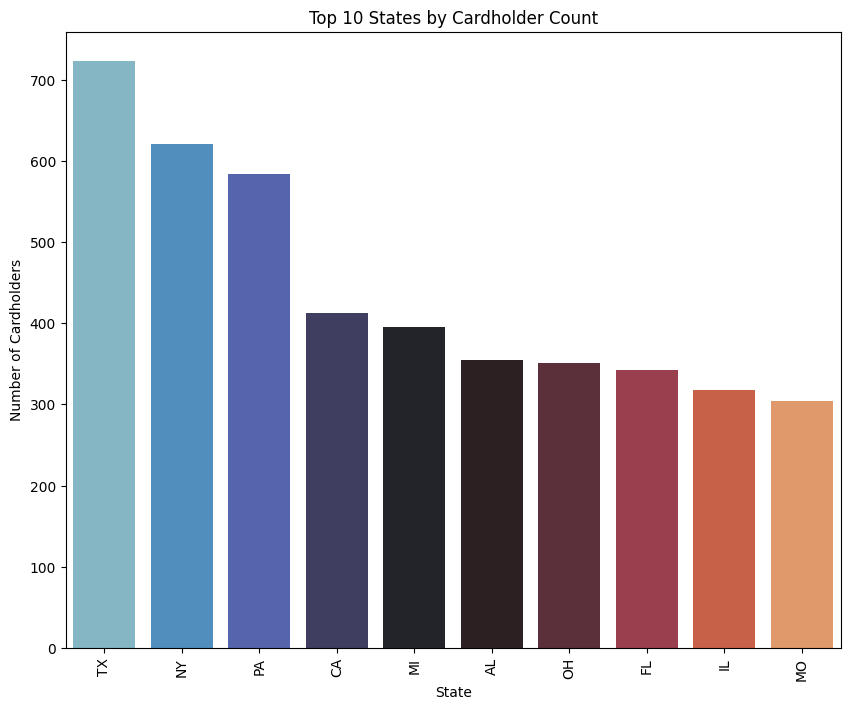

In [159]:
num_unique_states = df1['State'].nunique()
print("Number of different states represented:", num_unique_states)

state_counts = df1['State'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=state_counts.index[:10], y=state_counts.values[:10],palette='icefire')
plt.title('Top 10 States by Cardholder Count')
plt.xlabel('State')
plt.ylabel('Number of Cardholders')
plt.xticks(rotation=90)
plt.show()

#### The dataset includes cardholders from all 50 states, demonstrating a comprehensive geographic representation across the United States.The inclusion of all states highlights the dataset's diversity, ensuring that insights derived from the project are nationally representative.This broad state-level coverage provides an opportunity to uncover valuable insights about geographic trends in transactions and fraud, enabling targeted actions to enhance customer engagement and security.


### 10.How many different professions are listed

Number of different professions: 474


C:\Users\Hp\AppData\Local\Temp\ipykernel_9976\1256743982.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=profession_counts.index[:10], y=profession_counts.values[:10],palette='pastel')


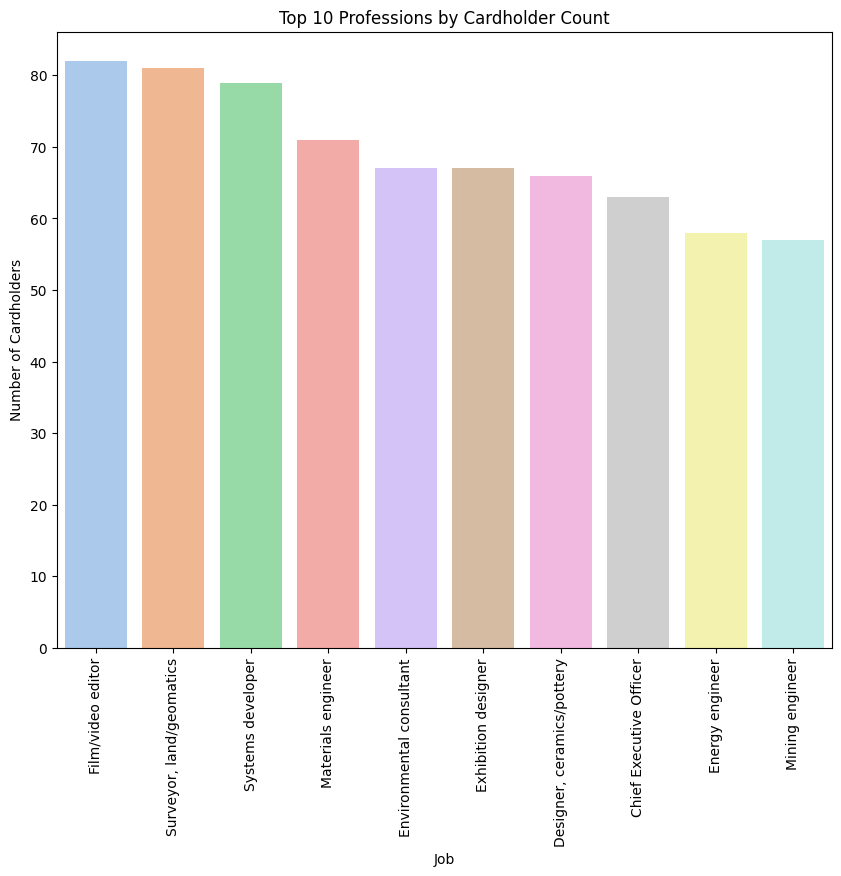

In [160]:
num_unique_professions = df1['Job'].nunique()
print("Number of different professions:", num_unique_professions)

profession_counts = df1['Job'].value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(x=profession_counts.index[:10], y=profession_counts.values[:10],palette='pastel')
plt.title('Top 10 Professions by Cardholder Count')
plt.xlabel('Job')
plt.ylabel('Number of Cardholders')
plt.xticks(rotation=90)
plt.show()


 #### The dataset includes 474 unique professions, indicating a diverse range of occupations among the cardholders.The wide variety of professions highlights a heterogeneous customer base, making the dataset well-suited for analyzing occupation-based transaction trends.

## Conclusion 

In conclusion, the credit card transaction project demonstrates how to leverage the power of pandas and data analysis techniques to analyze and derive insights from a dataset of credit card transactions. The project involved various stages, including data cleaning, preprocessing, and exploratory data analysis (EDA). By exploring transaction trends, detecting patterns, and identifying potential outliers or fraudulent activities, we were able to uncover valuable insights for decision-making.

The project highlighted the importance of data preprocessing, such as handling missing values, converting data types, and feature engineering, to ensure the quality of the analysis. Additionally, visualizations using pandas and libraries like Matplotlib or Seaborn provided an intuitive understanding of the data, revealing trends like spending behavior over time, common transaction categories, and customer activity.

Ultimately, this project not only showcases the practical application of pandas for handling large datasets but also illustrates how data-driven insights can improve credit card transaction analysis. The use of pandas enables efficient data manipulation, which is essential for creating predictive models, identifying fraudulent activities, and enhancing customer experiences in the financial sector. Future work can include integrating machine learning models to predict fraudulent transactions or segmenting customers for targeted offers.